In [1]:

import torch
import numpy as np
import pandas as pd
import torch.nn as nn

from torchvision import models,datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from torchsummary import summary
from torchvision.utils import make_grid
from torchvision.datasets import STL10
import itertools
import torch.optim as optim
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

In [2]:
transform = transforms.Compose([
	transforms.ToTensor(),
])


In [3]:
trainData = STL10('./data', split='train', transform=transform, download=True)
testData = STL10('./data', split='test', transform=transform, download=True)

100%|██████████| 2640397119/2640397119 [02:37<00:00, 16744619.00it/s]


Extracting ./data/stl10_binary.tar.gz to ./data
Files already downloaded and verified


In [4]:
print(trainData[110][0])

tensor([[[0.3608, 0.4078, 0.3412,  ..., 0.2627, 0.2314, 0.2314],
         [0.3804, 0.2275, 0.1765,  ..., 0.2353, 0.2196, 0.2275],
         [0.2745, 0.2039, 0.1098,  ..., 0.2275, 0.2588, 0.2549],
         ...,
         [0.7529, 0.7725, 0.6627,  ..., 0.2902, 0.3608, 0.5647],
         [0.5608, 0.5961, 0.6941,  ..., 0.3451, 0.2667, 0.4510],
         [0.7020, 0.7176, 0.7020,  ..., 0.2392, 0.3294, 0.2431]],

        [[0.5059, 0.5765, 0.5412,  ..., 0.6235, 0.5843, 0.5451],
         [0.5294, 0.3490, 0.3529,  ..., 0.4902, 0.4235, 0.3725],
         [0.5490, 0.3804, 0.2196,  ..., 0.4235, 0.4392, 0.4039],
         ...,
         [0.7686, 0.7922, 0.6980,  ..., 0.5255, 0.6157, 0.7843],
         [0.6000, 0.6157, 0.7098,  ..., 0.5922, 0.5333, 0.6980],
         [0.7412, 0.7451, 0.7137,  ..., 0.5412, 0.6000, 0.5176]],

        [[0.3843, 0.4118, 0.2902,  ..., 0.0667, 0.0549, 0.0784],
         [0.3843, 0.1922, 0.1686,  ..., 0.0824, 0.0863, 0.1137],
         [0.1961, 0.1333, 0.1529,  ..., 0.1020, 0.1098, 0.

In [5]:
print("Train Dataset Size: ", len(trainData))
print("Shape: ", trainData.data.shape)
print("Test Dataset Size: ", len(testData))
print("Shape: ", testData.data.shape)

Train Dataset Size:  5000
Shape:  (5000, 3, 96, 96)
Test Dataset Size:  8000
Shape:  (8000, 3, 96, 96)


dos bacth uno de 5000 para entrenamiento y otro de 8000 para prueba,3 canalaes, 96 alto y 96 ancho

Dataset contiene 13000 imagenes clasificadas en 10 catergorias o etiquetas.

In [6]:
classes = trainData.classes
print("Number of classes = ", len(classes))
print(classes)

Number of classes =  10
['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [7]:

image, label = trainData[0]
image.shape

torch.Size([3, 96, 96])

Label (numeric): 0
Label (textual): airplane


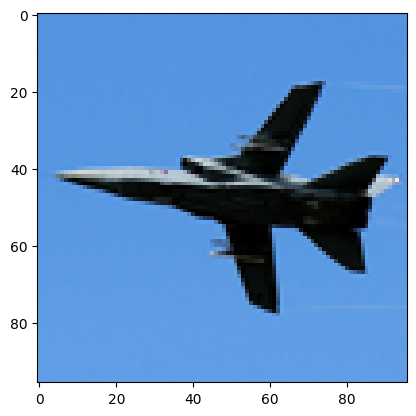

In [8]:
image, label = trainData[200]
plt.imshow(image.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [9]:
# import numpy as np
# import scipy.signal
# from skimage import color
# from skimage import exposure
# import random

# ix = random.randint(0, len(trainData))
# img, label = trainData[ix]
# plt.imshow(image.permute((1, 2, 0)))
# img = color.rgb2gray(img)

# kernel = np.array([[1,1,1],
#                    [0,0,0],
#                    [-1,-1,-1]])

# edges = scipy.signal.convolve2d(img, kernel, 'valid')
# edges = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# ax1.imshow(img, cmap=plt.cm.gray)
# ax2.imshow(edges, cmap=plt.cm.gray)
# plt.show()

In [10]:
classCount = {}
for i,j in trainData:
    labels = classes[j]
    if labels not in classCount:
        classCount[labels] = 0
    classCount[labels] += 1
classCount

{'bird': 500,
 'dog': 500,
 'horse': 500,
 'cat': 500,
 'truck': 500,
 'monkey': 500,
 'deer': 500,
 'ship': 500,
 'airplane': 500,
 'car': 500}

In [11]:
#version git
batch_size = 100
trainLoader = DataLoader(trainData, batch_size=batch_size, shuffle=True,num_workers=2,pin_memory =True)
testLoader = DataLoader(testData, batch_size=batch_size, shuffle=True,num_workers =2,pin_memory =True)

In [12]:
#version sensio
dataloader2 = {
    'train': torch.utils.data.DataLoader(trainData, batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(testData, batch_size=256, shuffle=False)
}

imgs, labels = next(iter(trainData))
imgs.shape

torch.Size([3, 96, 96])

In [13]:
train_images = trainData.data
train_labels =trainData.labels

test_labels= testData.labels
test_images= testData.data

In [ ]:
for images, labels in trainLoader:
    print('Images Shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

TEST

In [ ]:
model = models.resnet50()# se carga desde torchvision.models, # significa que el modelo utilize sus conocimientos previos
# model = model.to(device)
# #en resumen descargame los pesos que ya tiene este modelo(true) y (freeze)no me los cambies
# for param in model.parameters():
#     param.requires_grad = False#congelamiento de capas
#     #Al congelar ciertas capas de un modelo preentrenado, puedes utilizarlas como extractores de características fijas y
#     #evitar que se ajusten a los datos de entrenamiento. Esto puede ayudar a prevenir el sobreajuste y mejorar la generalización.
# summary(model, (3, 224, 224))

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

real test

In [ ]:
import torchvision

class ModelCustom(torch.nn.Module):
  def __init__(self, n_outputs=10, pretrained=True, freeze=False):
    super().__init__()
    # descargamos resnet
    resnet = torchvision.models.resnet50(pretrained=pretrained)
    # nos quedamos con todas las capas menos la última
    self.resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    if freeze:
      for param in self.resnet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(2048, 10)

  def forward(self, x):
    x = self.resnet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True

In [ ]:
model_custom = ModelCustom()
outputs = model_custom(torch.randn(64, 3, 96, 96))
outputs.shape

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader2['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader2['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [ ]:
#transfer learning a resnet50
model_c = ModelCustom(pretrained=True, freeze=False)
fit(model_c, dataloader2)

val_loss 0.85327 val_acc 0.77283: 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]


Epoch 1/5 loss 1.25980 val_loss 0.85327 acc 0.66673 val_acc 0.77283


val_loss 0.70209 val_acc 0.79150: 100%|██████████| 32/32 [00:08<00:00,  3.58it/s]


Epoch 2/5 loss 0.72470 val_loss 0.70209 acc 0.80320 val_acc 0.79150


val_loss 0.61173 val_acc 0.81689: 100%|██████████| 32/32 [00:09<00:00,  3.45it/s]


Epoch 3/5 loss 0.61277 val_loss 0.61173 acc 0.82041 val_acc 0.81689


val_loss 0.57737 val_acc 0.81812: 100%|██████████| 32/32 [00:08<00:00,  3.93it/s]


Epoch 4/5 loss 0.56069 val_loss 0.57737 acc 0.83525 val_acc 0.81812


val_loss 0.59897 val_acc 0.80176: 100%|██████████| 32/32 [00:08<00:00,  3.93it/s]

Epoch 5/5 loss 0.53029 val_loss 0.59897 acc 0.83742 val_acc 0.80176


In [ ]:
# # newmodel = torch.nn.Sequential(*(list(model.children())[:-1]))
# # summary(newmodel, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
# len(trainLoader)

NameError: ignored

NameError: ignored

(5000, 2048)
Length of Y_train 5000


(8000, 2048)
Length of Y_test 8000


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: 

5000

Accuracy:  0.8286


Confusion matrix

NameError: ignored

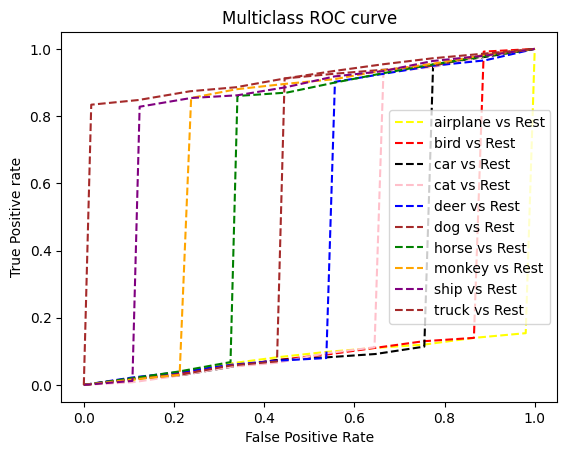

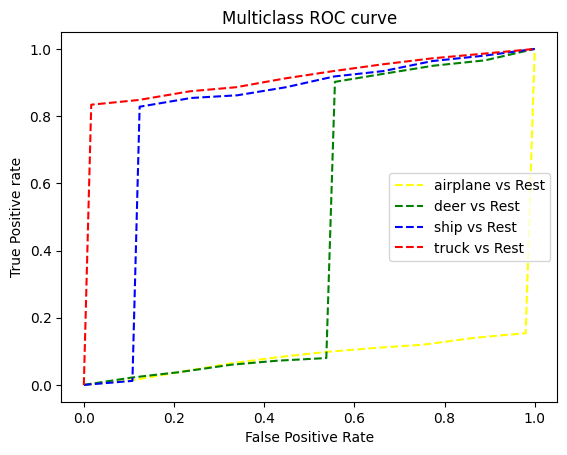

Accuracy:  0.097875


NameError: ignored

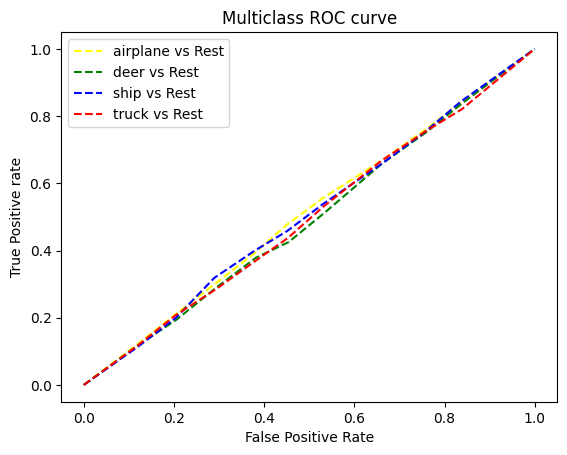